# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [101]:
import pandas as pd

data_frame = pd.read_csv('data/human_body_temperature.csv')

# Data Exploration

In [102]:
data_frame.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [103]:
data_frame.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [104]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


The data is composed of tuples of (temperature, gender and heart rate). There are 130 values of type float for temperature with no missing values. The temperatures vary between 96.3 and 100.8 with mean of 98.24 and standard deviation of 0.733183. The inter-quantile range shows that, half of these observations lie in (97.8, 98.7).

# Data Visualization

We now look at both quantitative and qualitative characteristics of the distribution to check for normality.

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import probplot
import statsmodels

sns.set()

# Slice temperature data
temperatures = data_frame['temperature']

We first look at the box plot to get a sense of how the data is distributed. 

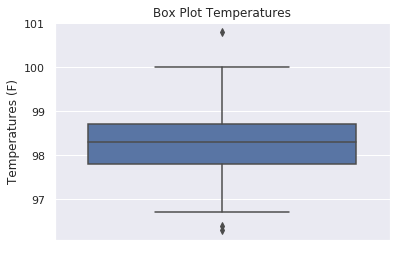

In [7]:
# Box Plot
_ = sns.boxplot(temperatures, orient='v')
_ = plt.ylabel('Temperatures (F)')
_ = plt.xlabel('')
_ = plt.title('Box Plot Temperatures')

The following figure shows a histogram with a bin size estimated by the Freedman-Diaconis rule given by
 $2 * IQR * n^{\frac{1}{3}}$

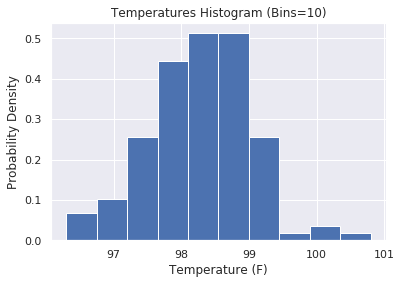

In [306]:
# Histogram
num_bins = int(np.ceil(2 * (98.7-97.8) * (130 ** (1/3))))
_ = plt.hist(temperatures, density=True, bins=num_bins)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Probability Density')
_ = plt.title('Temperatures Histogram (Bins=10)')

The distribution to roughly follow normal distribution except for higher values. 

Next, we look at the histogram overlaid with a best fit parametric Normal distribution, and a non-parametric distribution using Kernel Density Estimators.

Best Normal Fit with scipy: Mean=98.249, Standard Deviation=0.73036


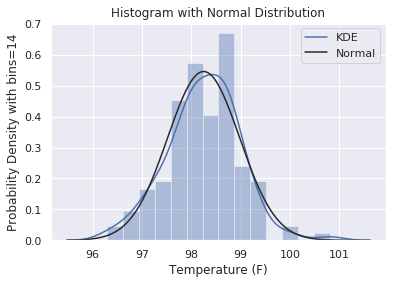

In [9]:
import warnings

# Needed to ignore a Future warning on sns.
warnings.filterwarnings('ignore')

# See what the best fit for the distribution is 
best_fit = norm.fit(temperatures)
print('Best Normal Fit with scipy: Mean={:2.5}, Standard Deviation={:2.5}'.format(best_fit[0], best_fit[1]))

# Plot Histogram overlaid with a best fit normal distribution and kde estimator distribution.
_ = sns.distplot(temperatures, fit=norm, bins=14, fit_kws={'label':'Normal'}, kde_kws={'label':'KDE'})
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Probability Density with bins=14')
_ = plt.legend()
_ = plt.title('Histogram with Normal Distribution')

An idealized normal distribution with parameters(98.249,0.73036) fits the data approximately. The overlaid non-parametric distribution shows some data intervals where we might expect deviations from the ideal normal curve.

We examine the qualitative characteristics using cumulative distribution functions and quantile plots. Plotting the cdfs gives us the following:

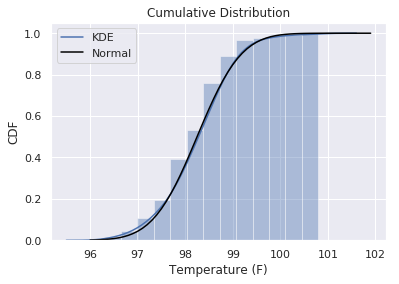

In [291]:
# Compute the cdf for the ideal normal curve
x_val = np.arange(96, 102, 0.1)
y_val = norm.cdf(x_val, best_fit[0], best_fit[1])

# Plot the cdf
_ = sns.distplot(temperatures, hist_kws={'cumulative':True}, kde_kws={'cumulative':True, 'label':'KDE'})
_ = plt.plot(x_val, y_val, label='Normal', color='black')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('CDF')
_ = plt.legend()
_ = plt.title('Cumulative Distribution')

Looking a CDFs for both parametric and non-parametric distributions, we see that the actual unknown distribution closely follows the normal distribution.

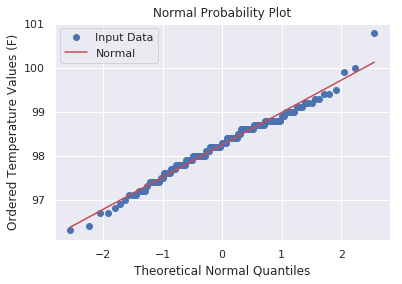

In [11]:
# Quantile-Quantile plot
_ = probplot(temperatures, dist='norm', plot=plt)
_ = plt.xlabel('Theoretical Normal Quantiles')
_ = plt.ylabel('Ordered Temperature Values (F)')
_ = plt.legend(['Input Data', 'Normal'])
_ = plt.title('Normal Probability Plot')

The red line in the Quantile-Quantile plot shows normal distribution quantiles, while the blue dots represent the ordered values from the input dataset. The input data closely follows the red line. In addition, there are no arcs, implying the input distribution is not skewed or heavier tailed than normal. Based on both these plots, we can expect the input data values to closely follow the normal distribution.

# Normality Tests

To convince ourselves that the distribution is indeed normal, we perform a few known tests for normality.

The first of these is the *Shapiro-Wilk* test, which assumes that distribution is normal as a null hypothesis. In addition, small values of the Weight statistic indicate deviation from normality.

In [12]:
# Shapiro-Wilk Test for normality
from scipy.stats import shapiro
W, p_value = shapiro(temperatures)
print('Shapiro-Wilk test: Weight={:2.5}, P-value={:2.5}'.format(W, p_value))

Shapiro-Wilk test: Weight=0.98658, P-value=0.23317


Since the P-value is greater than the significance level of say 5% and W is not very small, we can assume normality based on this test as p-value > 0.05.

Next we look at *Anderson-Darling* test for normality. The Anderson-Darling tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. 

In [13]:
# Anderson-Darling Test for normality
from scipy.stats import anderson
W, critical_values, significance_levels = anderson(temperatures, dist='norm')
print("Test Statistic: {:2.5}, Critical Levels: {}, Significance Levels: {}".format(W, critical_values, significance_levels))

Test Statistic: 0.5201, Critical Levels: [0.56  0.637 0.765 0.892 1.061], Significance Levels: [15.  10.   5.   2.5  1. ]


We see that the test statistic is less than all critical levels, which implies that we cannot reject null hypothesis for any of the significance levels. Again, we conclude that the distribution is probably normal.

One more test worth looking at is the *Kolmogorov-Smirnov* test for goodness of fit. This test performs a hypothesis test of the distribution G(x) of an observed random variable against a given distribution F(x), under the null hypothesis that the two distributions are identical, G(x)=F(x)

In [14]:
# Kolmogorov-Smirnov test for goodness of fit
from scipy.stats import kstest
ks, p_value = kstest(temperatures, 'norm')
print('Kolmogorov-Smirnov test: Test Statistic={:2.5}, P-value={:2.5}'.format(ks, p_value))

Kolmogorov-Smirnov test: Test Statistic=1.0, P-value=0.0


The p-value for this test is approximately zero, which gives us strong confidence that the original distribution is normal.

# Conditions for Central Limit Theorem

For Central Limit Theorem to hold the following conditions need to be satisfied:
- Random Sample
- Normality
- Independence

How the sample is collected is not explicitly stated, so we assume that the sample is randomly collected. The input distribution is close to the normal distribution on both quantitative and qualitative inspections. In addition, the number of samples collected is greater than 30, indicating that normality can be assumed. The number of samples collected is definitely less than 10% of the whole population of human beings on which we are trying to make an inference on, so independence can be assumed.

The sample satisfies all conditions for central limit theorem to hold, assuming it was collected randomly.

# Hypothesis Testing

In this section, we will try to answer the question:
> Is the  true population mean really 98.6 degrees F?

We start by examining the question using non-parametric Bootstrap Hypothesis test:

## Bootstrap Hypothesis Test

Let true population mean be $\mu$ and the standard deviation be sigma. For this test, we pick a significance level of *5%*.

We start with the following Null Hypothesis:
- **Null Hypothesis**: $\mu = 98.6 ^{\circ}F$
- **Alternative Hypothesis**: $\mu \neq 98.6 ^{\circ}F$

In the given sample, the sample mean $\hat{x} = 98.249$. We need to find by simulation, the probability of getting the sample mean $\hat{x}$ value as extreme as 98.249, given the true mean of the sample was truly 98. To perform this simulation:
1. **Mean Translation Step**: First subtract sample mean from the sample and add the true mean to every data point in the sample. This should effectively make the mean of the sample as 98.6.
2. **Bootstrap Step**: Pick same number of samples from the sample independently. Simulate this 10000 times.
3. **P-Value Step**: Compute p-value as the fraction of samples that are at least as extreme as the sample mean.

If this p-value is less than the significance level, we can reject the Null Hypothesis and conclude that the population mean is different from 98.6.

In [308]:
# Bootstrap Hypothesis Test
significance_level = 0.05
known_mean = 98.6
num_trials = 10000
sample_mean = np.mean(temperatures)

# Step 1: Translate Means
x_translated = temperatures - sample_mean + known_mean

# Step 2: Pick 10000 Random Samples of size 130
# Define function to extract samples and compute test statistic.
def draw_bs_runs(data, func, size=1):
    """Draws a Bootstrap sample from data and computes test statistic specified by func, repeats size times."""
    
    # Initialize bootstrap test statistic return values
    bs_replicates = np.empty(size)
    
    for i in range(size):
        
        # Draw independent sample of size len(data)
        x_permuted = np.random.choice(data, size=len(data))
    
        # Compute test statistic
        bs_replicates[i] = func(x_permuted)
        
    return bs_replicates

# Define test statistic function as difference from mean to compare with
def diff_from_mean(data, mean=known_mean):
    """Subtracts the known mean from data."""
    return np.mean(data) - mean

# Draw samples and compute statistics
sample_means = draw_bs_runs(x_translated, diff_from_mean, num_trials)

# Step 3: Compute P-Value
p_value = np.sum(abs(sample_means) > abs(sample_mean - known_mean)) / len(sample_means)

if(p_value > significance_level):
    print('Cannot reject null hypothesis. P-value is {:2.5%}  > Significance level {:2.5%}'.format(p_value, significance_level))
else:
    print('Reject null hypothesis. P-value is {:2.5%} <= Significance level {:2.5%}'.format(p_value, significance_level))

Reject null hypothesis. P-value is 0.00000% <= Significance level 5.00000%


We see that the P-value is almost zero and so we reject null hypothesis and conclude with *95%* confidence that **the population mean is not equal to $98.6 ^{\circ}F$**

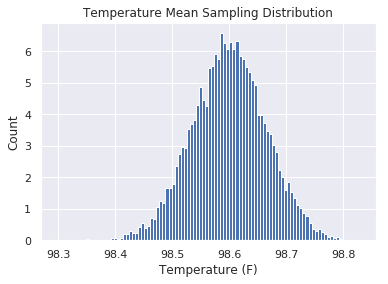

In [317]:
# Plot the Sampling Distribution
_ = plt.hist(sample_means + 98.6, density=True, bins=100)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Count')
_ = plt.title('Temperature Mean Sampling Distribution')

## Parametric Hypothesis Tests

Since, we have only one sample, only one-sample tests can be used for testing this hypothesis. 

We know only the population mean to compare to in this and not the population standard deviation. For this reason, we use the sample deviation to find the t-statistic over z-statistic. However, since the number of samples $n > 30$, the t-distribution behaves almost like a normal distribution, and the *t critical value will almost nearly be equal to the z critical value and hence expect the test result and confidence intervals to be the same*.

### Using the t-statistic

The t-statistic is computed as: $t=\frac{(\hat{x}-\mu)}{\frac{\sigma_{x}}{\sqrt{n}}}$ where:
- $\hat{x}$ is the sample mean
- $\mu$ is the known population mean
- $\sigma_{x}$ is the sample standard deviation
- $n$ is the number of samples

The confidence interval is given by: $\hat{x} \pm t^{*}SE$ where:
- $t^{*}$ is the t-critical value for 129 degrees of freedom and 95% confidence interval
- $SE$ is the standard error and equal to $\frac{\sigma_{x}}{\sqrt{n}}$

In [113]:
from scipy.stats import t as tdist

# t-statistic
def t_statistic(data, conf_level = 0.975, pop_mean = known_mean):
    """Computes t-statistic given data and confidence level."""

    # Degrees of freedom
    df = len(data) - 1
    
    # Sample mean
    sample_mean = np.mean(data)

    # Standard error
    std_error = np.std(data) / (len(data) ** 0.5)
    print('Std-error = {:2.5}'.format(std_error))

    # T-score
    t_score = abs(sample_mean - pop_mean) / std_error
    print('T-Statistic = {:2.5}'.format(t_score))

    # P-Value for 2 sided hypothesis
    p_value = 2*(1 - tdist.cdf(t_score, df))
    print('P-value = {:2.5}'.format(p_value))

    # T-Critical value
    t_critical = tdist.ppf(conf_level, df)
    print('T critical value = {:2.5}'.format(t_critical))

    # Margin of Error
    m_error = t_critical * std_error
    print('Margin of error = {:2.5}'.format(m_error))

    # Confidence Interval
    print('{:2.0%} Confidence Interval = ({:2.5},{:2.5})'.format(conf_level-(1-conf_level), sample_mean - m_error, sample_mean + m_error))

t_statistic(temperatures)

Std-error = 0.064057
T-Statistic = 5.4759
P-value = 2.1887e-07
T critical value = 1.9785
Margin of error = 0.12674
95% Confidence Interval = (98.122,98.376)


*We see that the T-Statistic is much greater than T critical value and associated P-value is approximately zero. In addition, the confidence interval does not contain 98.6. So, we can reject the null hypothesis.*

### Using the z-statistic

The z-statistic is computed similar to t-statistic, only here we use the normal distribution instead of Student's t-distribution to get critical values and assume sample standard deviation is approximately equal to population standard deviation.

In [328]:
# Z-statistic
def z_statistic(data, conf_level = 0.975, pop_mean = known_mean):
    """Computes z statistic given data and confidence level."""
    
    # Sample mean
    sample_mean = np.mean(data)

    # Standard error
    std_error = np.std(data) / (len(data) ** 0.5)
    print('Std-error = {:2.5}'.format(std_error))

    # z-score
    z_score = abs(sample_mean - known_mean) / std_error
    print('Z-Statistic = {:2.5}'.format(z_score))

    # P-Value
    p_value = 2*(1 - norm.cdf(z_score))
    print('P-value = {:2.5}'.format(p_value))

    # Z-Critical value
    z_critical = norm.ppf(conf_level)
    print('Z critical value = {:2.5}'.format(z_critical))

    # Margin of Error
    m_error = z_critical * std_error
    print('Margin of error = {:2.5}'.format(m_error))

    # Confidence Interval
    print('{:2.0%} Confidence Interval = ({:2.5},{:2.5})'.format(conf_level-(1-conf_level), sample_mean-m_error, \
                                                                 sample_mean+m_error))
    
z_statistic(temperatures)

Std-error = 0.064057
Z-Statistic = 5.4759
P-value = 4.3523e-08
Z critical value = 1.96
Margin of error = 0.12555
95% Confidence Interval = (98.124,98.375)


*As expected, there is not much of difference using either statistic as the number of samples is large enough for both (t and normal) distributions to behave similarly.*

### Does small sample size have any difference in test results?

To determine this a random sample of size 10 is taken and both t-statistic and z-statistic are computed again. For n < 30, it is possible that the normality assumption is violated due to low number of points in the sample.

In [158]:
# Take a random sample of size 10
x_sample_10 = np.random.choice(temperatures, size=10)

# t-statistic
print('T-Statistic:')
t_statistic(x_sample_10)

print('-------------------------')

# z-statistic
print('Z-Statistic:')
z_statistic(x_sample_10)

T-Statistic:
Std-error = 0.20545
T-Statistic = 2.093
P-value = 0.065866
T critical value = 2.2622
Margin of error = 0.46476
95% Confidence Interval = (97.705,98.635)
-------------------------
Z-Statistic:
Std-error = 0.20545
Z-Statistic = 2.093
P-value = 0.036353
Z critical value = 1.96
Margin of error = 0.40268
95% Confidence Interval = (97.767,98.573)


Comparing the two critical values, the t-critical value = $2.2622$ while the z-critical value is $1.96$. The t-test is more conservative and given that the sample size is small, more variance might be expected in smaller samples. Hence, the t-test is more suitable for smaller sample size hypothesis testing.

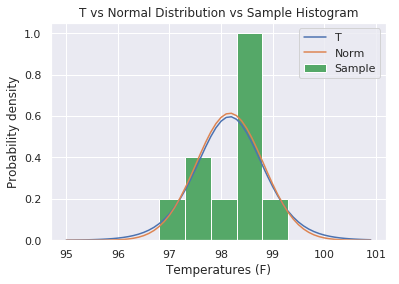

In [159]:
# Visualize t and normal distributions

x_v = np.arange(95, 101, 0.1)
t_v = tdist.pdf(x_v, len(x_sample_10)-1, np.mean(x_sample_10), np.std(x_sample_10))
z_v = norm.pdf(x_v, np.mean(x_sample_10), np.std(x_sample_10))

_ = plt.plot(x_v, t_v)
_ = plt.plot(x_v, z_v)
_ = plt.hist(x_sample_10, bins=5, density=True)
_ = plt.xlabel('Temperatures (F)')
_ = plt.ylabel('Probability density')
_ = plt.legend(['T', 'Norm', 'Sample'])
_ = plt.title('T vs Normal Distribution vs Sample Histogram')

As the figure above shows, the sample points are not normally distributed and the t-distribution at degrees of freedom = 9, is slightly flatter with heavier tails, Hence the tail probabilities are slightly higher leading to more conservative test results.
*In the example, above the t-test failed to reject the null hypothesis at significance level of 5%, while the z-test statistic did.*

### Detecting Outliers

Abnormal temperatures are deviations from the norm. The two robust estimators for measuring dispersion around a central tendency are **Inter-Quantile range** and **Median Absolute Deviation around Median**. In terms of IQR, a robust estimator is 1.5 times IQR distance below first quartile or above third quartile.

#### Inter-Quantile Range

In [107]:
data_frame.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


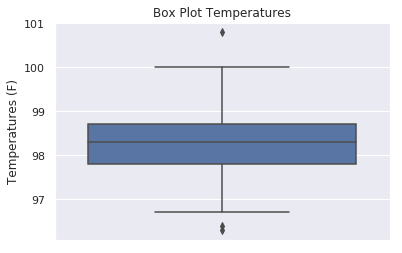

In [106]:
# Box Plot
_ = sns.boxplot(temperatures, orient='v')
_ = plt.ylabel('Temperatures (F)')
_ = plt.xlabel('')
_ = plt.title('Box Plot Temperatures')

Recreating box plot above, we can see $1.5*IQR$=1.35 and outliers can be classified as values lying outside the interval **(96.45, 100.05)**.

#### Using Median Absolute Deviation for Outlier Detection

Median Absolute Deviation around median is a robust estimator is computed as: $mad = \frac{median(|x_{i} - median(x_{i})|)}{c}$ where:
- $c$ is probability density of normal distribution at $\frac{3}{4}$
- $x_{i}$ is a sampled point.

Margin of error for this statistical measure is computed using by multiplying a threshold value of $\pm 2.527$, that probability density of the normal distribution for 99% Confidence Interval to the measure.

In [273]:
from statsmodels import robust

# Confidence Interval using Median
# Median Absolute Deviation around Median
conf_level = 0.995
sample_median_ad = robust.scale.mad(temperatures)
sample_median = np.median(temperatures)
thres = norm.ppf(0.995)
med_error = thres * sample_median_ad 
print('{:2.0%} Confidence Interval for Median Absolute Deviation around Median = ({:2.5},{:2.5})'.format(\
    conf_level-(1-conf_level), sample_median-med_error, sample_median+med_error))

99% Confidence Interval for Median Absolute Deviation around Median = (96.391,100.21)


Using median absolute deviation around median (*mad*) gives us a interval of **(96.391, 100.21)** for valid values.

#### Using Bootstrap Method for Outlier detection.

Roughly the method followed is the similar to that of hypothesis test only using *(0.5%, 99.5%)percentiles* as the test statistic. The steps are:
1. Collect a simple random sample of size, same as n, and compute *(0.5%, 99.5%)* percentiles. Collect 10,000 such samples.
2. The percentile median deviations (0.5%, 99.5%) give the range of values for each percentile for 99% Confidence Interval.
3. We pick the median values for each percentile out of their respective empirical distributions.

In [277]:
# Bootstap Method for estimating 0.5% and 99.5% percentiles

conf_level = 0.995

def lower_func(data, k=(1-conf_level)*100):
    """Computes lower 0.5% percentile of the data."""
    return np.percentile(data, [k])

def upper_func(data, k=conf_level*100):
    """Computes upper 0.5% percentile of the data."""
    return np.percentile(data, [k])

# Draw samples and compute statistics
bs_lower = draw_bs_runs(temperatures, lower_func, num_trials)
lower_val = np.median(bs_lower)
bs_upper = draw_bs_runs(temperatures, upper_func, num_trials)
upper_val = np.median(bs_upper)

print('{:2.0%} Confidence Interval for temperatures = ({:2.5},{:2.5})'.format(\
    conf_level-(1-conf_level), lower_val, upper_val))

99% Confidence Interval for temperatures = (96.365,100.28)


*Estimated percentile range **(96.365, 100.28)** is similar to what is seen with other methods.*

### Is there a significant difference between males and females in normal temperature?

To answer this question, we use the permutation test to compute the probability of difference of means observed for males vs females, if we take a random permutation for the observed values regardless of gender.

In addition, the actual distributions are also verified by comparing means using a two sample bootstrap hypothesis and parametric tests.

Null Hypothesis: There is no difference in means of males vs females. $\mu_{m}- \mu_{f}= 0$, where $\mu_{m}$ is the mean of male data, while $\mu_{f}$ is the mean of female data.

Alternative Hypothesis: $\mu_{m}- \mu_{f} \neq 0$


#### Visual Exploration of differences

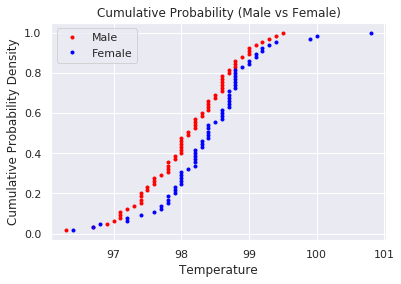

In [287]:
# Helper function to view Cumulative distribution function.
def ecdf(data):
    """Cumulative Distribution Function"""
    
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    
    return x, y

male_data = data_frame[data_frame.gender == 'M']['temperature']
female_data = data_frame[data_frame.gender == 'F']['temperature']

x, y = ecdf(male_data)
_ = plt.plot(x, y, marker='.', linestyle='none', color='red')

x, y = ecdf(female_data)
_ = plt.plot(x, y, marker='.', linestyle='none', color='blue')

_ = plt.legend(['Male', 'Female'])
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Cumulative Probability Density')
_ = plt.title('Cumulative Probability (Male vs Female)')

Best Normal Fit (Male): Mean=98.105, Standard Deviation=0.69336
Best Normal Fit (Female): Mean=98.394, Standard Deviation=0.73775


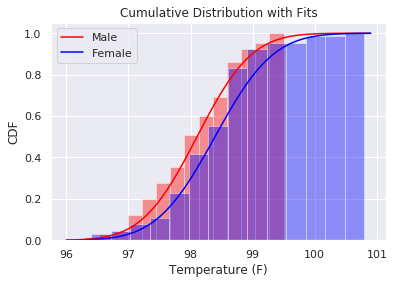

In [304]:
# See what the best fit for the distribution is 
male_best_fit = norm.fit(male_data)
print('Best Normal Fit (Male): Mean={:2.5}, Standard Deviation={:2.5}'.format(male_best_fit[0], male_best_fit[1]))
female_best_fit = norm.fit(female_data)
print('Best Normal Fit (Female): Mean={:2.5}, Standard Deviation={:2.5}'.format(female_best_fit[0], female_best_fit[1]))

x_val = np.arange(96, 101, 0.1)
male_y_val = norm.cdf(x_val, male_best_fit[0], male_best_fit[1])
female_y_val = norm.cdf(x_val, female_best_fit[0], female_best_fit[1])

# Plot the cdfs for male and female
_ = sns.distplot(male_data, bins=14, hist_kws={'cumulative':True, 'density':True, 'color':'red'}, kde=False)
_ = sns.distplot(female_data, bins=14, hist_kws={'cumulative':True, 'density':True, 'color':'blue'}, kde=False)

_ = plt.plot(x_val, male_y_val, label='Male Fit', color='red')
_ = plt.plot(x_val, female_y_val, label='Female Fit', color='blue')

#_ = plt.plot(x_val, y_val, label='Normal', color='black')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('CDF')
_ = plt.legend(['Male', 'Female'])
_ = plt.title('Cumulative Distribution with Fits')

On Visual exploration, we do expect to see a difference in means of the distributions of temperature between the two genders.

####  Permutation Test

In [290]:
significance_level = 0.05

def permutation_sample(data_1, data_2):
    """Computes a permutation sample for merged data1 and data2"""
    
    # Concatenate data sets
    data = np.concatenate([data_1, data_2])

    # Draw permuted sample
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data_1)]
    perm_sample_2 = permuted_data[len(data_1):]
    
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Define test statistic function as difference from mean to compare with
def diff_of_means(data_1, data_2):
    """Difference of means from data."""
    return np.mean(data_1) - np.mean(data_2)

# Draw samples and compute statistics
sample_means = draw_perm_reps(male_data, female_data, diff_of_means, num_trials)

# Step 3: Compute P-Value
p_value = np.sum(abs(sample_means) > abs(np.mean(male_data) - np.mean(female_data))) / len(sample_means)

if(p_value > significance_level):
    print('Cannot reject null hypothesis. P-value is {:2.5%}  > Significance level {:2.5%}'.format(p_value, significance_level))
else:
    print('Reject null hypothesis. P-value is {:2.5%} <= Significance level {:2.5%}'.format(p_value, significance_level))


Reject null hypothesis. P-value is 2.30000% <= Significance level 5.00000%


The permutation test shows that the probability of getting the difference of means as extreme as the current difference of means is < $5$%.Therefore, we conclude that male vs female means are different.

####  Two Sample Bootstrap hypothesis test

For two sample bootstrap hypothesis test, we do exactly the same steps as one-sample test. We shift the male and female distributions to the combined mean and then do hypothesis test by collecting 10000 samples.

In [327]:
# Compute mean of all temperatures
mean_temp = np.mean(temperatures)

# Generate shifted arrays
temp_male_shifted = male_data - np.mean(male_data) + mean_temp
temp_female_shifted = female_data - np.mean(female_data) + mean_temp

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_male = draw_bs_runs(temp_male_shifted, np.mean, 10000)
bs_replicates_female = draw_bs_runs(temp_female_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_female - bs_replicates_male

# Compute and print p-value: p
p_value = np.sum(abs(bs_replicates) > abs(diff_of_means(female_data, male_data))) / len(bs_replicates)
print('P-value is {:2.5%} <= Significance level {:2.5%}'.format(p_value, significance_level))

P-value is 2.36000% <= Significance level 5.00000%


The two sample bootstrap hypothesis test also reaches the same conclusion, that the means are different with probability < 5%

#### Parametric test for difference of means

Here we compute the difference of means and compute the total variance of the difference of two normal distributions that we also expect to be normal.

In [344]:
# Parametric test using z-statistic
conf_level  = 0.975

# Sample diff means
diff_mean = diff_of_means(male_data, female_data)

# Standard errors change as the variances add up
var_male = np.var(male_data)
var_female = np.var(female_data)
var_total = var_male + var_female
std_total = (var_total ** 0.5)
std_error = std_total / (len(male_data) ** 0.5)
print('Std-error = {:2.5}'.format(std_error))

# z-score
z_score = abs(diff_mean) / std_error
print('Z-Statistic = {:2.5}'.format(z_score))

# P-Value
p_value = 2*(1 - norm.cdf(z_score))
print('P-value = {:2.5}'.format(p_value))

# Confidence Interval
m_error = norm.ppf(conf_level) * std_error
print('{:2.0%} Confidence Interval = ({:2.5},{:2.5})'.format(conf_level-(1-conf_level), diff_mean-m_error, \
                                                                 diff_mean+m_error))

Std-error = 0.12558
Z-Statistic = 2.3032
P-value = 0.021266
95% Confidence Interval = (-0.53536,-0.043105)


Again the p-value of approximately 2.3% is obtained leading us to conclude that the difference of means is not zero and hence the two means are not the same.

## Conclusion

We can conclude the following from the data provided:
- We are 95% confident, that the mean normal temperature of the population is different from the well known 98.6 degrees F, but lies in the interval (97.767,98.573)
- We are 95% confident, that the mean normal temperature of men and women are different. Men are 95% likely to have a mean normal temperature between (-0.54, -0.04) than women.